In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import natsort

In [2]:
sns.set_style("whitegrid")
sns.set_context("paper")

In [3]:
def summarize(df, label):
    df["size"] = df["end"] - df["start"]

    avg_tad_size = df.groupby("chrom")["size"].mean()
    num_tads = df.groupby("chrom")["size"].count()

    avg_tad_size["all"] = df["size"].mean()
    num_tads["all"] = len(df)

    return pd.DataFrame({f"{label}_avg_tad_size": avg_tad_size, f"{label}_num_tads": num_tads})

In [7]:
def generate_summary(directory = '../../data/latest_assembly/nfcore_hic/balanced_cool/tads_32_k/'):
    code_to_common_name = {'GCF_000002035.6_GRCz11': 'ZebraFish',
                               'chicken': 'Chicken',
                               'GCF_000003025.6_Sscrofa11.1': 'Pig',
                               'hg38_r2': 'Human',
                               'GCF_000001635.27_GRCm39': 'Mouse',
                               'GCF_015227675.2_mRatBN7.2': 'Rat',
                               'canFam6_r3': 'Dog',
                               'GCF_002263795.2_ARS-UCD1.3': 'Cow',
                               'GCF_018350175.1_F.catus_Fca126_mat1.0': 'Cat',
                               'GCF_016772045.1_ARS-UI_Ramb_v2.0': 'Sheep',
                               'GCF_003339765.1_Mmul_10': 'Rhesus',
                               'GCF_009806435.1_UM_NZW_1.0': 'Rabbit'}

    domains_files = [f for f in os.listdir(directory) if f.endswith('_domains.bed')]
    tads = {}
    summaries= []
    for file in domains_files[:]:
        file_path = os.path.join(directory, file)
        species = file.split("_d")[0]
        if species in ["GCF_000002285.5_Dog10K_Boxer_Tasha","GCF_000001405.40_GRCh38.p14","GCF_016699485.2_bGalGal1.mat.broiler.GRCg7b"]:continue
        species = code_to_common_name[species]
        tad_df = pd.read_csv(file_path, sep='\t',names=('chrom', 'start', 'end',4,5,6,7,8,9), header=None)
        tad_df = tad_df[tad_df['chrom']!="chrY"]
        tads[species] = tad_df
        summary = summarize(tad_df,species)
        summaries.append(summary)
    combined_df = pd.concat(summaries, axis='columns')
    combined_df = (
        combined_df.reset_index()
        .sort_values(by='chrom', key=natsort.natsort_key)
        .fillna(0)
        .round()
        .astype(int, errors='ignore')
    )
    combined_df = combined_df[~combined_df['chrom'].str.startswith('chrUn')]
    combined_df = combined_df[combined_df['chrom']!="chr8_KZ208915v1_fix"]
    # combined_df.rename(columns=code_to_common_name,inplace=True)
    return combined_df,tads

In [8]:
full_summary,tads = generate_summary()
# # full_summary.to_csv(output_table, sep="\t", index=False)

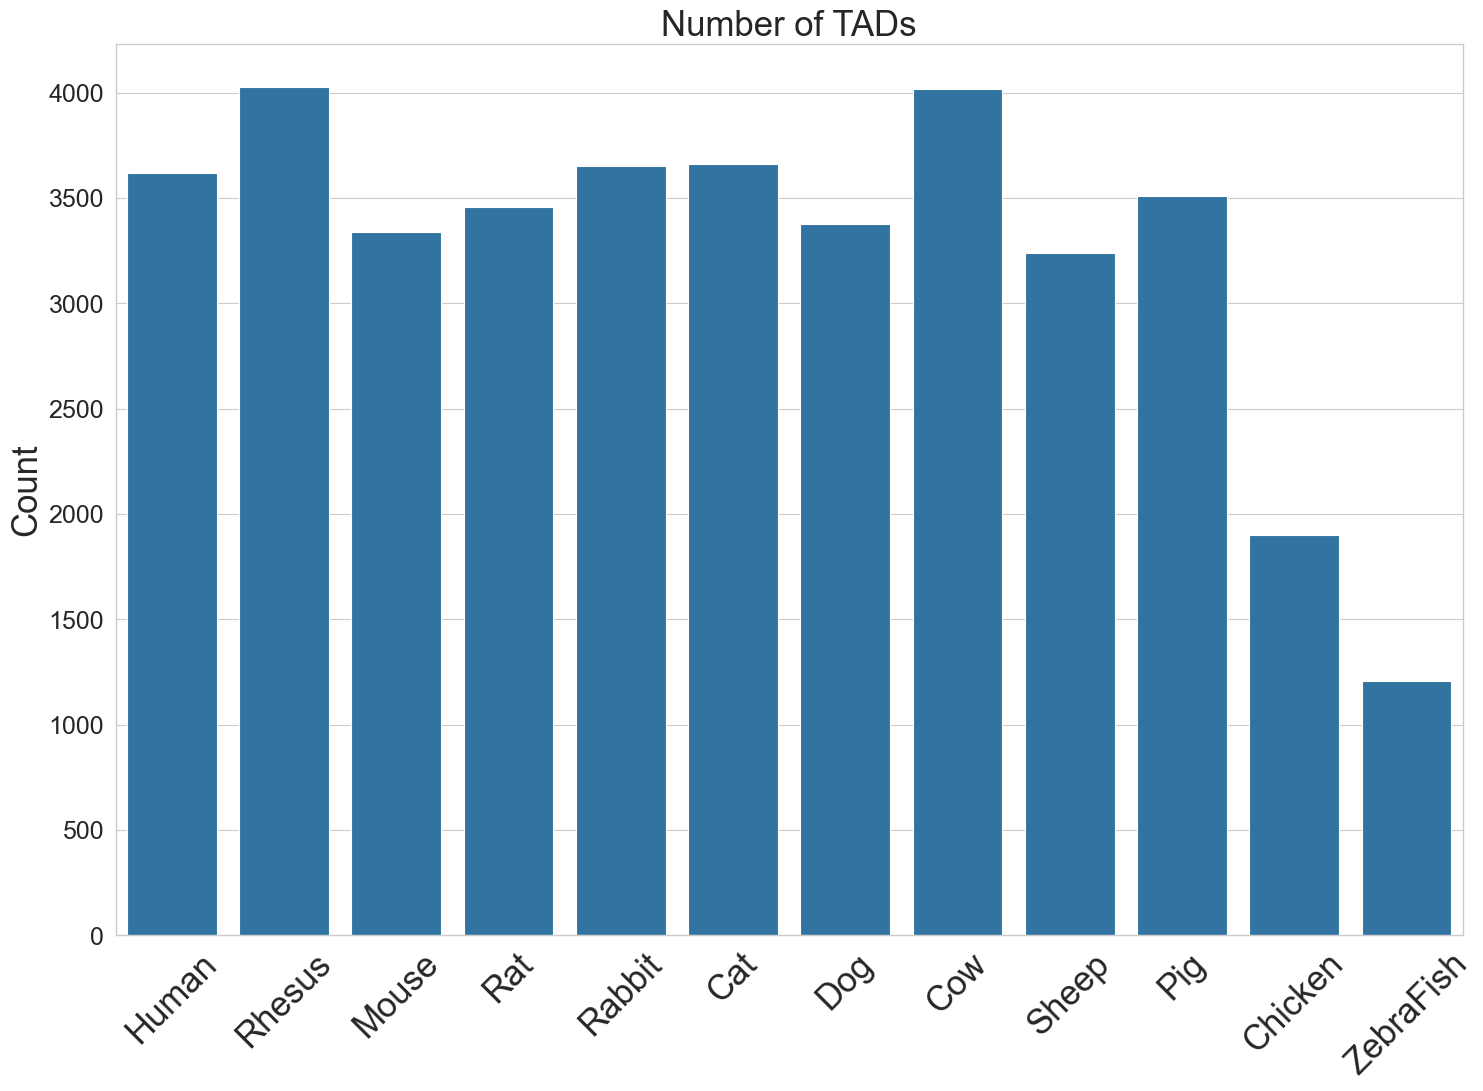

In [11]:
plt.figure(figsize=(15, 11))

labels = list(tads.keys())
sizes = [len(t) for t in tads.values()]

sizes = pd.DataFrame({"x": labels, "y": sizes})
order = ['Human', 'Rhesus', 'Mouse', 'Rat', 'Rabbit', 'Cat', 'Dog',  'Cow', 'Sheep','Pig', 'Chicken', 'ZebraFish']
sizes  = sizes.set_index('x').reindex(order).reset_index()

sns.barplot(sizes, x="x", y="y")
plt.xticks(rotation=45,fontsize=25)
plt.yticks(fontsize=18)
plt.xlabel("")
plt.ylabel("Count",fontsize=25)
plt.title("Number of TADs", fontsize=25)
plt.tight_layout()
plt.savefig("../images/supplementary/tad_number.png", bbox_inches='tight', dpi=600)
# fig.savefig("../images/supplementary/tad_number.svg")
plt.show()


In [130]:
# plt.figure(figsize=(15, 11))
#
# labels = []
# sizes = []
# ylim = (0.0, 3_000_000)
#
# for label, df in tads.items():
#     labels.extend([label] * len(df))
#     sizes.extend((df["end"] - df["start"]).tolist())
#
# sizes = pd.DataFrame({"x": labels, "y": sizes})
# sizes["y"] = sizes["y"] / 1.0e6
# counts = {label: len(df) for label, df in tads.items()}
# ylim = [x / 1.0e6 for x in ylim]
#
# # order = ['Human', 'Rhesus', 'Mouse', 'Rat', 'Rabbit', 'Cat', 'Dog',  'Cow', 'Sheep','Pig', 'Chicken', 'Zfish']
# # sizes['x'] = pd.Categorical(sizes['x'], categories=order, ordered=True)
# # sizes = sizes.sort_values('x')
# #
#
# color_palette = sns.color_palette("pastel",12).as_hex()
# palette = {label: color_palette[i] for i, label in enumerate(counts.keys())}
#
# sns.violinplot(sizes, x="x", y="y", density_norm='count',hue="x",palette=palette)
#
# plt.xlabel("")
# plt.ylabel("TAD size (Mbp)",fontsize=25)
# plt.title("TAD size distribution", fontsize=25)
#
# plt.xticks(rotation=45,fontsize=25)
# plt.yticks(fontsize=18)
#
# # plt.savefig("../images/supplementary/tad_number.png", bbox_inches='tight', dpi=600)
# plt.tight_layout()
# plt.show()

In [ ]:
def read_coord_file(fname):
    with open(fname,'r') as coord:
        coord_file = coord.readlines()[1:]
        coord_dict = {
            'Gene_name': [i.strip().split()[0] for i in coord_file if len(i.strip().split())==5], 'Chr': [i.strip().split()[1] for i in coord_file if len(i.strip().split())==5],
            'Start': [int(i.strip().split()[2]) for i in coord_file if len(i.strip().split())==5], 'End': [int(i.strip().split()[3]) for i in coord_file if len(i.strip().split())==5],
            'Strand': [i.strip().split()[4] for i in coord_file if len(i.strip().split())==5]}
    coord.close()
    return coord_dict

In [152]:

# div_time = {'mr': 13.10}
div_time = {'mr': 13.10, 'cs': 24.60,'hr': 28.82, 'cd': 55.4, 'csp': 61.8,'cspcd': 76.0,'mrr': 79.0,  'hrmrr': 87.2, 'hrmrrcspcd': 94.0, 'hrmrrcspcdc': 318.9, 'hrmrrcspcdcz': 429.0}

In [153]:
def get_code_conversion(code):
    alignment_code_to_species = {'hr':          'human;rhesus',
                                 'mr':          'mouse;rat',
                                 'cd':          'cat;dog',
                                 'cs':          'cow;sheep',
                                 'csp':         'pig;cow;sheep',
                                 'mrr':         'mouse;rabbit;rat',
                                 'cspcd':       'pig;cow;sheep;dog;cat',
                                 'hrmrr':       'human;mouse;rhesus;rabbit;rat',
                                 'hrmrrcspcd':  'human;mouse;rhesus;rabbit;rat;pig;cow;sheep;dog;cat',
                                 'hrmrrcspcdc': 'human;mouse;rhesus;rabbit;rat;pig;cow;sheep;dog;cat;chicken',
                                 'hrmrrcspcdcz':'human;mouse;rhesus;rabbit;rat;pig;cow;sheep;dog;cat;chicken;zfish'}
    return alignment_code_to_species.get(code)

In [160]:
def get_tad_in_sb(species, aln,full_summary,df,coord_path="/Users/fabianpa/Desktop/new_sequences/sb_in_tad_3/"):


    for common_name in species:
        fname = os.path.join(coord_path, f"{common_name.lower()}_{aln}.tad.sb")
        sb_tad_coord = pd.read_csv(fname,sep="\t",usecols=[5,6,7,3,4], names=("aln", "strand", "chr", "start", "stop"),header=None)[["chr", "start", "stop", "aln", "strand"]]
        cname=common_name.capitalize()+"_num_tads"
        tot_tad_num = full_summary.loc[full_summary["chrom"]=="all",cname].values[0]
        df.loc[aln, common_name.capitalize()] = round(len(sb_tad_coord)/tot_tad_num,3)
    return df

columns = ['Human', 'Rhesus', 'Mouse', 'Rat', 'Rabbit', 'Cat', 'Dog', 'Cow', 'Sheep', 'Pig', 'Chicken', 'Zfish']
indices = ['mr', 'cs', 'hr', 'cd', 'csp', 'cspcd', 'mrr', 'hrmrr', 'hrmrrcspcd', 'hrmrrcspcdc', 'hrmrrcspcdcz']
tad_coverage = pd.DataFrame(index=indices, columns=columns)

for aln in div_time.keys():
    species = get_code_conversion(aln).split(';')
    tad_coverage = get_tad_in_sb(species, aln,full_summary,tad_coverage)

tad_coverage.to_csv("../images/supplementary/tad_in_sb.csv")